In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv("../data/raw/1-3_rooms_2025-05-25_22-50.csv")
df

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price_per_month,commissions,price,district,street,house_number,underground,residential_complex
0,Alpha Star Properties,real_estate_agent,https://www.cian.ru/sale/flat/315745436/,Москва,sale,flat,25,61,1,60.0,-1,0,75000000,Пресненский,Краснопресненская набережная,14Ак1,Москва-Сити,Capital Towers
1,White and Broughton,real_estate_agent,https://www.cian.ru/sale/flat/313640113/,Москва,sale,flat,6,41,1,40.1,-1,0,35500000,Хорошевский,Ленинградский проспект,37/5,Аэропорт,Прайм Парк
2,ГЕЛИОС,real_estate_agent,https://www.cian.ru/sale/flat/317161765/,Москва,sale,flat,6,9,1,21.0,-1,0,7950000,Бабушкинский,Енисейская,17К3,Бабушкинская,NaN
3,Татьяна Серебрякова,realtor,https://www.cian.ru/sale/flat/314672030/,Москва,sale,flat,14,16,1,40.0,-1,0,12700000,Марьино,Новомарьинская,16К1,Братиславская,NaN
4,ZAPAD REALTY - офис Маршала Жукова,real_estate_agent,https://www.cian.ru/sale/flat/317810772/,Москва,sale,flat,13,41,1,43.1,-1,0,21500000,Хорошево-Мневники,Шелепихинская набережная,34к5,Шелепиха,Сердце Столицы
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,Kalinka Group,real_estate_agent,https://www.cian.ru/sale/flat/315110417/,Москва,sale,flat,5,6,3,77.5,-1,0,80000000,Басманный,переулок Лялин,NaN,Курская,NaN
416,NF GROUP,real_estate_agent,https://www.cian.ru/sale/flat/307861416/,Москва,sale,flat,4,5,3,157.0,-1,0,89000000,Пресненский,Столярный переулок,3к34,Улица 1905 года,Рассвет Loft-Studio
417,do A.S.A.P.,real_estate_agent,https://www.cian.ru/sale/flat/317625822/,Москва,sale,flat,14,20,3,109.0,-1,0,17000000,Бирюлево Восточное,6-я Радиальная,7/1к1,Каспийская,Царицыно-2
418,Славянский Двор Остоженка,real_estate_agent,https://www.cian.ru/sale/flat/303267485/,Москва,sale,flat,17,53,3,102.0,-1,0,95000000,Раменки,Мосфильмовская,8,Ломоносовский проспект,Дом на Мосфильмовской


In [24]:
df.columns

Index(['author', 'author_type', 'url', 'location', 'deal_type',
       'accommodation_type', 'floor', 'floors_count', 'rooms_count',
       'total_meters', 'price_per_month', 'commissions', 'price', 'district',
       'street', 'house_number', 'underground', 'residential_complex'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   author               420 non-null    object 
 1   author_type          420 non-null    object 
 2   url                  420 non-null    object 
 3   location             420 non-null    object 
 4   deal_type            420 non-null    object 
 5   accommodation_type   420 non-null    object 
 6   floor                420 non-null    int64  
 7   floors_count         420 non-null    int64  
 8   rooms_count          420 non-null    int64  
 9   total_meters         420 non-null    float64
 10  price_per_month      420 non-null    int64  
 11  commissions          420 non-null    int64  
 12  price                420 non-null    int64  
 13  district             402 non-null    object 
 14  street               418 non-null    object 
 15  house_number         415 non-null    obj

In [26]:
df.nunique()

author                 176
author_type              5
url                    420
location                 1
deal_type                1
accommodation_type       1
floor                   38
floors_count            48
rooms_count              3
total_meters           265
price_per_month          1
commissions              1
price                  288
district                97
street                 268
house_number           224
underground            176
residential_complex    124
dtype: int64

Удалим константные столбцы, и столбцы содержащие все уникальные значениям (url)

In [27]:
df.drop(['location', 'deal_type', 'accommodation_type', 'price_per_month', 'commissions', 'url'], axis=1, inplace=True)

In [28]:
df

,author,author_type,floor,floors_count,rooms_count,total_meters,price,district,street,house_number,underground,residential_complex
0,Alpha Star Properties,real_estate_agent,25,61,1,60.0,75000000,Пресненский,Краснопресненская набережная,14Ак1,Москва-Сити,Capital Towers
1,White and Broughton,real_estate_agent,6,41,1,40.1,35500000,Хорошевский,Ленинградский проспект,37/5,Аэропорт,Прайм Парк
2,ГЕЛИОС,real_estate_agent,6,9,1,21.0,7950000,Бабушкинский,Енисейская,17К3,Бабушкинская,NaN
3,Татьяна Серебрякова,realtor,14,16,1,40.0,12700000,Марьино,Новомарьинская,16К1,Братиславская,NaN
4,ZAPAD REALTY - офис Маршала Жукова,real_estate_agent,13,41,1,43.1,21500000,Хорошево-Мневники,Шелепихинская набережная,34к5,Шелепиха,Сердце Столицы
...,...,...,...,...,...,...,...,...,...,...,...,...
415,Kalinka Group,real_estate_agent,5,6,3,77.5,80000000,Басманный,переулок Лялин,NaN,Курская,NaN
416,NF GROUP,real_estate_agent,4,5,3,157.0,89000000,Пресненский,Столярный переулок,3к34,Улица 1905 года,Рассвет Loft-Studio
417,do A.S.A.P.,real_estate_agent,14,20,3,109.0,17000000,Бирюлево Восточное,6-я Радиальная,7/1к1,Каспийская,Царицыно-2
418,Славянский Двор Остоженка,real_estate_agent,17,53,3,102.0,95000000,Раменки,Мосфильмовская,8,Ломоносовский проспект,Дом на Мосфильмовской


In [29]:
df.isna().sum()

author                   0
author_type              0
floor                    0
floors_count             0
rooms_count              0
total_meters             0
price                    0
district                18
street                   2
house_number             5
underground              4
residential_complex    196
dtype: int64

Удалим столбцы-имена собственные:

In [30]:
df.drop(['author', 'author_type', 'residential_complex'], axis=1, inplace=True)

In [31]:
df

,floor,floors_count,rooms_count,total_meters,price,district,street,house_number,underground
0,25,61,1,60.0,75000000,Пресненский,Краснопресненская набережная,14Ак1,Москва-Сити
1,6,41,1,40.1,35500000,Хорошевский,Ленинградский проспект,37/5,Аэропорт
2,6,9,1,21.0,7950000,Бабушкинский,Енисейская,17К3,Бабушкинская
3,14,16,1,40.0,12700000,Марьино,Новомарьинская,16К1,Братиславская
4,13,41,1,43.1,21500000,Хорошево-Мневники,Шелепихинская набережная,34к5,Шелепиха
...,...,...,...,...,...,...,...,...,...
415,5,6,3,77.5,80000000,Басманный,переулок Лялин,NaN,Курская
416,4,5,3,157.0,89000000,Пресненский,Столярный переулок,3к34,Улица 1905 года
417,14,20,3,109.0,17000000,Бирюлево Восточное,6-я Радиальная,7/1к1,Каспийская
418,17,53,3,102.0,95000000,Раменки,Мосфильмовская,8,Ломоносовский проспект


Посмотрим на распределение цены:

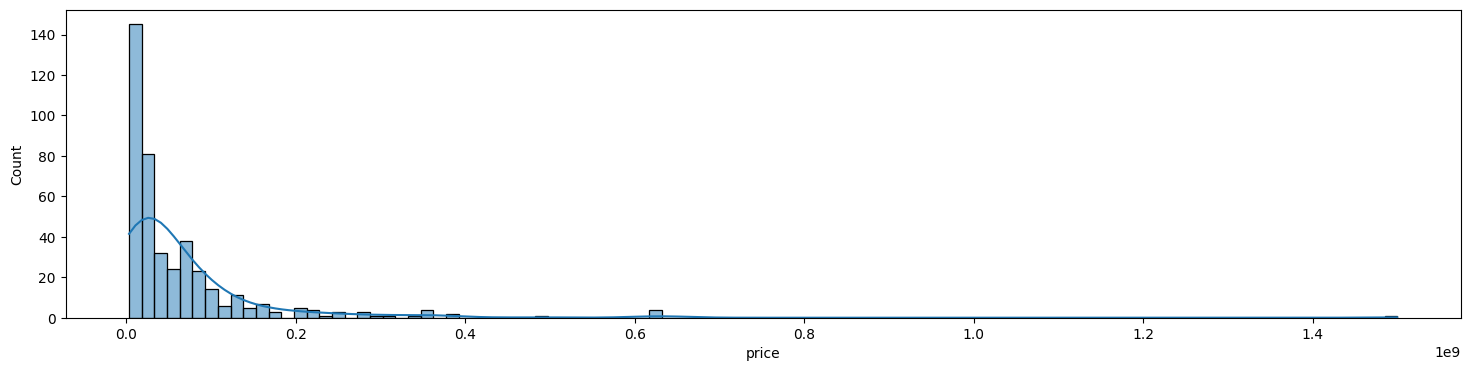

In [32]:
fig = plt.figure(figsize=(18, 4))
sns.histplot(df['price'], kde=True, bins=100);

Распределение комнатности квартир:

In [33]:
df['rooms_count'].value_counts()

rooms_count
1    140
2    140
3    140
Name: count, dtype: int64

Достаточно равномерно

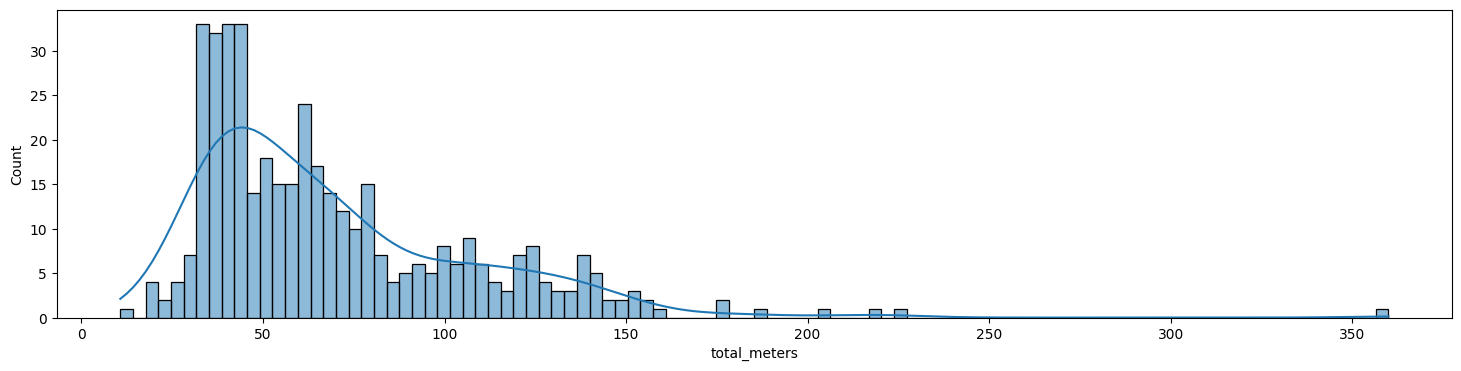

In [34]:
fig = plt.figure(figsize=(18, 4))
sns.histplot(df['total_meters'], kde=True, bins=100);

Посмотрим на выбросы в цене и в метрах:

In [35]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

In [36]:
need_columns = ['total_meters', 'price']
for column in need_columns:
    print(detect_outliers(df[[column]],column).drop_duplicates())

     total_meters
363         360.0
          price
155   630000000
186   350000000
221   380000000
302   279000000
317   349000000
332   310000000
344   357500000
352   280000000
358   335000000
363  1499900000
364   488786625
403   299000000


In [37]:
def drop_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    return df[(df[column] > lower_bound) & (df[column] < upper_bound)]

In [38]:
clean_df = df
for column in need_columns:
    clean_df = drop_outliers(clean_df, column)

In [39]:
clean_df

,floor,floors_count,rooms_count,total_meters,price,district,street,house_number,underground
0,25,61,1,60.0,75000000,Пресненский,Краснопресненская набережная,14Ак1,Москва-Сити
1,6,41,1,40.1,35500000,Хорошевский,Ленинградский проспект,37/5,Аэропорт
2,6,9,1,21.0,7950000,Бабушкинский,Енисейская,17К3,Бабушкинская
3,14,16,1,40.0,12700000,Марьино,Новомарьинская,16К1,Братиславская
4,13,41,1,43.1,21500000,Хорошево-Мневники,Шелепихинская набережная,34к5,Шелепиха
...,...,...,...,...,...,...,...,...,...
415,5,6,3,77.5,80000000,Басманный,переулок Лялин,NaN,Курская
416,4,5,3,157.0,89000000,Пресненский,Столярный переулок,3к34,Улица 1905 года
417,14,20,3,109.0,17000000,Бирюлево Восточное,6-я Радиальная,7/1к1,Каспийская
418,17,53,3,102.0,95000000,Раменки,Мосфильмовская,8,Ломоносовский проспект


После удаления выбросов осталось 354 квартиры

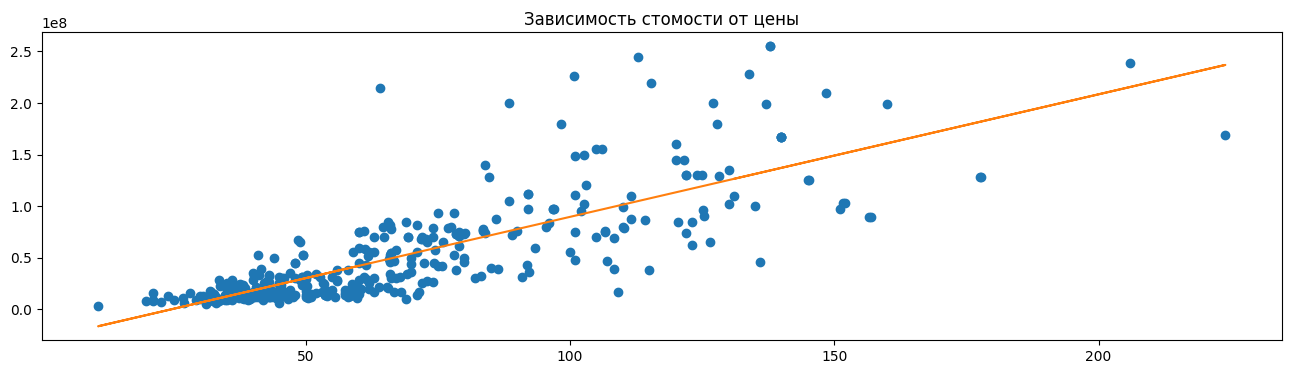

In [40]:
fig = plt.figure(figsize=(16, 4))
x = clean_df['total_meters']
y = clean_df['price']

plt.plot(x, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)
plt.title('Зависимость стомости от цены')
plt.plot(x, m*x+b);

In [41]:
clean_df.to_csv("../data/processed/clean_flat_data.csv")